In [31]:
from pandas import read_csv
import numpy as np

In [14]:
df  = read_csv("international-airline-passengers.csv" , usecols = [1])
#usecols is done to get rid of the months detail as we don't really need it

In [15]:
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [16]:
values = df.values.astype("float32")

In [20]:
type(values) , values.shape

(numpy.ndarray, (144, 1))

In [24]:
train_size = int(values.shape[0] *0.67)

test_size = values.shape[0] - train_size
test_size

48

In [131]:
train = values[0:train_size]

In [132]:
test = values[train_size: ]

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
scaler = MinMaxScaler(feature_range = (0,1))

In [133]:
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [134]:
def create_dataset(data , k):
    dataX , dataY = [] ,[]
    for i  in range(data.shape[0] - k):
        #x is the data which I will store in the datax
        x = data[i:i+k , 0]
        y = data[i+k , 0]
        
        dataX.append(x)
        dataY.append(y)
        
        
    return np.array(dataX) , np.array(dataY)
        

In [135]:
look_back = 12
trainX,trainY = create_dataset(train , look_back)
testX , testY = create_dataset(test , look_back)

In [136]:
trainX = np.reshape( trainX , (trainX.shape[0] , trainX.shape[1] , 1))

testX = np.reshape( testX , (testX.shape[0] , testX.shape[1] , 1))

In [44]:
from keras.models import Sequential
from keras.layers import SimpleRNN , Dense

In [137]:
model = Sequential()
model.add(SimpleRNN(4 , input_shape = (look_back , 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam')
model.fit(trainX,trainY , epochs = 100 , batch_size = 1)


Epoch 1/100
84/84 [==============================] - 2s 23ms/step - loss: 0.2132
Epoch 2/100
84/84 [==============================] - 0s 6ms/step - loss: 0.0643
Epoch 3/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0618
Epoch 4/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0591
Epoch 5/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0569
Epoch 6/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0536
Epoch 7/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0502
Epoch 8/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0440
Epoch 9/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0348
Epoch 10/100
84/84 [==============================] - 0s 6ms/step - loss: 0.0253
Epoch 11/100
84/84 [==============================] - 0s 6ms/step - loss: 0.0217
Epoch 12/100
84/84 [==============================] - 0s 6ms/step - loss: 0.0209
Epoch 13/100
84/84 [================

In [138]:
testPredict = model.predict(testX)

In [139]:
testPredict = scaler.inverse_transform(testPredict).ravel()
testPredict.shape

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

In [140]:
testTrue = scaler.inverse_transform([testY]).ravel()
testTrue.shape

trainTrue = scaler.inverse_transform([trainY]).ravel()


In [61]:
import matplotlib.pyplot as plt

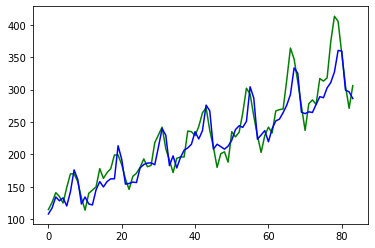

In [143]:
plt.plot(trainTrue , c = 'g')
plt.plot(trainPredict , c = 'b')
plt.show()

In [145]:
combinedPredicted = np.concatenate((trainPredict ,testPredict))

combinedTrue = np.concatenate((trainTrue , testTrue))

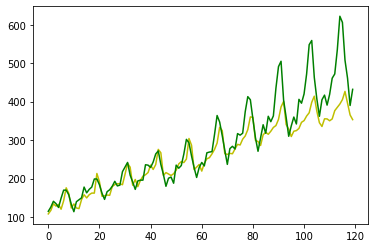

In [147]:
plt.plot(combinedPredicted , c = 'y')
plt.plot(combinedTrue , c = 'g')
plt.show()